In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation # do the animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  # display the animation in notebook
import sys

# Game of Life 

In [49]:
# values for cell on or off in the grid
alive = 1 # values for cell alive
dead = 0 # value for cell dead
vals = [alive, dead]

## Basic functions for Game of Life implementation

### Grid animation 

In [50]:
def show_GoF(grid,frames=200,interval=200):
    # show the grid 
    N=grid.shape[0]
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest', cmap='Greys') 
    animation_grid = FuncAnimation(fig, update_gridImage, fargs=(img, grid, ), frames=200, interval=200, save_count=50) # animation  # init_func=create_grid
    plt.close()
    
    return animation_grid


### Grid generation

In [40]:
# I will use a predefined number, then it could be chosen by the user as input.
# Grid = matrix NxN in a two dimensional space
# the random pattern is the default one if not explicitly declared, the same for the size

random = np.random.choice(vals, (50-1)*(50-1), p=[0.2, 0.8]).reshape(50-1, 50-1)

def create_grid(N=50, pattern=random, localisation = 'top left'):
    grid = np.zeros((N, N))
    # we add the pattern to the grid (declaration above)
    grid = add_pattern_to_grid(grid, pattern, localisation)
        
    return grid

### Update grid function

![GameOfLifeDiagram.png](attachment:d415ee4c-1526-44d7-947a-6fa40078d48a.png)

In [54]:
def update_gridImage(frameNum, img, grid):
    
    N=np.size(grid,axis=0)
       
    grid_tmp = grid.copy() # not to mess up with the original one
    for i in range(N):
        for j in range(N):
            # get the total number of neighbors of the cell
            neighbors = grid[(i+1)%N,j] + grid[i,(j+1)%N] + grid[(i-1)%N,j] + grid[i,(j-1)%N] + grid[(i+1)%N,(j+1)%N] + grid[(i-1)%N,(j-1)%N] + grid[(i+1)%N,(j-1)%N] + grid[(i-1)%N,(j+1)%N]
 
            # check if it is still alive or not
            if grid[i, j] == alive:
                if (neighbors < 2) or (neighbors > 3):
                    grid_tmp[i, j] = dead
            else:
                if neighbors == 3:  # a dead cell with 3 neighbors can reborn
                    grid_tmp[i, j] = alive
 
    grid[:] = grid_tmp[:] # change the old grid
    img.set_data(grid_tmp) # update the image
    
    
    
    return img, grid


def update_grid(grid):
    
    N=np.size(grid,axis=0)
       
    grid_tmp = grid.copy() # not to mess up with the original one
    for i in range(N):
        for j in range(N):
            # get the total number of neighbors of the cell
            neighbors = grid[(i+1)%N,j] + grid[i,(j+1)%N] + grid[(i-1)%N,j] + grid[i,(j-1)%N] + grid[(i+1)%N,(j+1)%N] + grid[(i-1)%N,(j-1)%N] + grid[(i+1)%N,(j-1)%N] + grid[(i-1)%N,(j+1)%N]
 
            # check if it is still alive or not
            if grid[i, j] == alive:
                if (neighbors < 2) or (neighbors > 3):
                    grid_tmp[i, j] = dead
            else:
                if neighbors == 3:  # a dead cell with 3 neighbors can reborn
                    grid_tmp[i, j] = alive
 
    grid[:] = grid_tmp[:] # change the old grid
    
    
    return grid

# GoF Patterns
https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/

### - Still lifes pattern  (patterns woh stay the same in function of the time)

still life description

Block description

In [6]:
# block
block = np.array([[alive, alive], 
                  [alive, alive]])

Beehive description

In [7]:
#beehive
beehive = np.array([ [ 0, alive, alive, 0],
                    [alive, 0, 0, alive], 
                    [ 0, alive, alive, 0,]])

Loaf description

In [8]:
# loaf
loaf = np.array([[0, alive, alive, 0],
                 [alive, 0, 0, alive],
                 [0, alive, 0, alive],
                 [0, 0, alive, 0]])

Boat description

In [9]:
# boat
boat = np.array([[alive, alive, 0],
                 [alive, 0, alive],
                 [0, alive, 0]])

Tub

In [10]:
# tub
tub = np.array([[0, alive, 0],
                [alive, 0, alive],
                [0, alive, 0]])

The biggest still life pattern

In [11]:
biggestStillLife =  np.array([[0,1,0,0,0,1,0,0,0,1,0],
                             [1,0,1,0,1,0,1,0,1,0,1],
                             [1,0,1,0,1,0,1,0,1,0,1],
                             [0,1,1,0,1,0,1,0,1,1,0],
                             [0,0,0,0,1,0,1,0,0,0,0],
                             [0,0,0,0,1,0,1,0,0,0,0],
                             [0,0,0,1,1,0,1,1,0,0,0],
                             [0,0,1,0,0,0,0,1,0,0,0],
                             [0,0,1,1,0,1,1,0,0,0,0],
                             [0,0,0,0,1,0,1,0,0,0,0],
                             [0,0,0,1,0,0,1,0,0,0,0],
                             [0,0,0,1,0,1,0,0,0,0,0],
                             [0,0,1,1,0,1,1,0,0,0,0]])

### - Oscillators patterns


Blinker description

In [12]:
# the more simple oscillator 
blinker = np.array([[0, 0, 0],
                    [alive, alive, alive],  
                    [0, 0, 0]])

Toad description

In [13]:
# toad 
toad = np.array([[0, 0, 0, 0],
                 [0, alive, alive, alive],
                 [alive, alive, alive, 0],
                 [0, 0, 0, 0]])

Beacon description

In [14]:
# beacon
beacon = np.array([[alive, alive, 0, 0],
                   [alive, 0, 0, 0],
                   [0, 0, 0, alive],
                   [0, 0, alive, alive]])

Pulsar description : oscilator with period 3

In [15]:
# pulsar
pulsar = np.zeros((15, 15))
pulsar[1, 3:6] = alive
pulsar[3:6, 6] = alive
pulsar += pulsar.T
pulsar += pulsar[:, ::-1]
pulsar += pulsar[::-1, :]

Penta-decathlon description : oscilator with period 15


In [16]:
penta_dec = np.zeros((16, 9))
penta_dec[2, 3:6] = alive
penta_dec[3:5, 4] = alive
penta_dec[5, 3:6] = alive
penta_dec[7, 3:6] = alive
penta_dec += penta_dec[::-1, :]

# or also this : pentadecathlon =  np.ones((1,10))

### - Spaceships patterns : 
#### These are finite patterns that return to its initial state after a number of generations (known as their period) but in a different location.

Glider - period of 5 

In [17]:
glider = np.array([[0, 0, alive], [alive, 0, alive], [0, alive, alive]])


3 spaceships 

In [18]:
spaceships3 =  np.array([[0,0,0,0,1,1,0],
                         [1,1,1,1,0,1,1],
                         [1,1,1,1,1,1,0],
                         [0,1,1,1,1,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,1,1,0],
                         [0,1,1,1,0,1,1],
                         [0,1,1,1,1,1,0],
                         [0,0,1,1,1,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,1,1,0],
                         [0,0,1,1,0,1,1],
                         [0,0,1,1,1,1,0],
                         [0,0,0,1,1,0,0]])

### - More complex pattern 

The conway pattern - a simple pattern that become a constant complex pattern composed of 15 still life pattern, 4 oscillators and some spaceships patterns after 1103 iterations 


In [19]:
conway = np.array([[0, alive, alive], [alive, alive, 0], [0, alive, 0]])

Gosper Glider cannon - creating glider 

In [20]:
gliderCannon =  np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
    [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

The Puffer Train - What happens is the 'train' starts moving and leaves a trail of mess behind, kind of like the smoke from a train. 

In [21]:
puffer = np.array([[0,1,1,1,1],
                   [1,0,0,0,1],
                   [0,0,0,0,1],
                   [1,0,0,1,0]])
temp = np.array([[0,1,0,0,0],
                 [0,0,1,0,0],
                 [0,0,1,0,0],
                 [0,1,1,0,0],
                 [1,0,0,0,0]])

puffer = np.concatenate([puffer, np.zeros((2,5)), temp, np.zeros((3,5)) , puffer[:4, :] ])


Max - Max is a special pattern which was discovered by Tim Coe. It the smallest starting population of any spacefiller.

In [22]:
# https://www.conwaylife.com/wiki/Max

maxp = 18*'0' + '1'+ 8*'0'+ 17*'0'+'111'+7*'0'+ 12*'0'+'111'+4*'0' + '11'+6*'0'+\
      11*'0'+'100111001011'+14*'0'+'1'+3*'0'+'10100101'+5*'0' +\
      10*'0'+'1'+4*'0'+'1010101011'+14*'0'+'1'+4*'0'+'1010001100'+4*'1'+5*'0'+'101'+4*'0'+'1'+3*'0'+'1011100' +\
      '1'+3*'0'+'11010111011'+9*'0'+'1101'+5*'0'+'11'+5*'0'+'1'+14*'0'+'1001101001001011'+17*'0' +'10101010101'+\
      5*'0'+4*'1'+'010011010010010011010110001'

maxp = np.array([float(g) for g in maxp]).reshape(13,27)
maxb=np.flip(maxp)
inter = '1'+5*'0'+'110001010100011'+5*'0'+'1'
inter =np.array([float(g) for g in inter]).reshape(1,27)

maxCoe=np.concatenate([maxp,inter,maxb])



### function for adding the pattern to the grid

In [23]:
# grid : the grid where we want to put the pattern
# pattern : the pattern of alive and death cells we want at the begining
# localisation : the loclisation of the top left celle of the pattern in the grid

# output: the grid with the pattern

def add_pattern_to_grid(grid, pattern, localisation = 'middle'):
    # dimension of the pattern
    c = np.size(pattern,axis=0)
    l = np.size(pattern,axis=1)
    
    if (localisation == 'top left') :
        grid[1:1+c, 1:1+l] = pattern # add the pattern in the top left corner
    else :
        N = np.size(grid,axis=0) # number of columns (= number of lines)
        grid[N//2:N//2+c, N//2:N//2+l] = pattern # add the pattern in the middle

    ####### ADD OTHER GRID LOCATIONS ########
        
    return grid

# GoF implementation

## Small dimension

#### Penta decathlon

In [52]:
# here we can generate the grid with dimension and pattern parameters
# show the grid and the animation
N = 20
grid = create_grid(N, penta_dec)
#print(grid)

# show the GoF grid animation
animation = show_GoF(grid)
# in anaconda prompt you have to do : conda install -c conda-forge ffmpeg 
HTML(animation.to_html5_video()) # must use it in notebook in order to visualize the animation

#### Random pattern

In [25]:
# show the GoF grid animation
animation = show_GoF(create_grid())
# in anaconda prompt you have to do : conda install -c conda-forge ffmpeg 
HTML(animation.to_html5_video()) # must use it in notebook in order to visualize the animation

## High dimension with complex pattern

#### Conway pattern

In [66]:
N=100
grid = create_grid(N, conway, 'middle')
animation = show_GoF(grid)
HTML(animation.to_html5_video())

#### Glider Cannon

In [32]:
N=100
grid = create_grid(N, gliderCannon)
animation = show_GoF(grid)
HTML(animation.to_html5_video())

#### Max ( space filler)

In [70]:
N = 250
grid = create_grid(N, maxCoe, 'middle')
animation = show_GoF(grid,100,100 )
HTML(animation.to_html5_video())

#### Puffer

In [28]:
N = 150
grid = create_grid(N, puffer, 'top left')
animation = show_GoF(grid)
HTML(animation.to_html5_video())

# Frequency analysis

In [75]:
#img = plt.imshow(grid, interpolation='nearest', cmap='Greys')
#plt.close()
#N = 50

# returns the type of the pattern and its period
def freq_calculator(pattern):
    pattern_size = pattern.shape #get dimension of pattern

    grid = create_grid(pattern=pattern) #create the grid with the pattern
    N=grid.shape[0]
    u_grid = grid.copy()

    pattern_type = 'Nothing' #default pattern type and frequency
    frequency = 0
    
    for i in range(50):
        u_grid = update_grid(u_grid) #update of the grid

        for j in range(N):
            for k in range(N):
                # if it is a still lifes
                """if (np.array_equal(u_grid[j:j+pattern_size[0],k:k+pattern_size[1]],pattern)) and (i == 0):
                    pattern_type = 'Still Lifes'
                    return pattern_type, frequency """
                
                if (np.array_equal(u_grid,grid)) and (i == 0):
                    pattern_type = 'Still Lifes'
                    return pattern_type, frequency
                
                # if it is an oscillator
                """ if (i > 0) and (np.array_equal(u_grid[j:j+pattern_size[0],k:k+pattern_size[1]],pattern)) and (np.array_equal(u_grid,grid)):
                    pattern_type = 'Oscillator'
                    frequency = i+1
                    return pattern_type, frequency"""
                
                if (i > 0) and (np.array_equal(u_grid,grid)):
                    pattern_type = 'Oscillator'
                    frequency = i+1
                    return pattern_type, frequency
                
                
                # if it is a spaceship
                if (i > 0) and (np.array_equal(u_grid[j:j+pattern_size[0],k:k+pattern_size[1]],pattern)) and (np.array_equal(u_grid,grid) == False) and (np.sum(u_grid) == np.sum(grid)):
                    pattern_type = 'Spaceship'
                    frequency = i+1
                    return pattern_type, frequency
                
                # if it is a pattern that ganerates spaceships
                if (i > 0) and (np.array_equal(u_grid[j:j+pattern_size[0],k:k+pattern_size[1]],pattern)) and (np.array_equal(u_grid,grid) == False):
                    pattern_type = 'Spaceship generator'
                    frequency = i+1
                    return pattern_type, frequency
    
    return pattern_type, frequency

print(" Block : ", freq_calculator(block))
print(" Blinker : ",freq_calculator(blinker))
print(" Glider : ",freq_calculator(glider))
print(" Penta decathlon : ",freq_calculator(penta_dec))
print(" Glider Cannon : ",freq_calculator(gliderCannon))
print(" Puffer : ",freq_calculator(puffer))
print(" Max : ",freq_calculator(maxCoe)) # the pattern type is "spacefiller" it fills the space

 Block :  ('Still Lifes', 0)
 Blinker :  ('Oscillator', 2)
 Glider :  ('Spaceship', 4)
 Penta decathlon :  ('Oscillator', 15)
 Glider Cannon :  ('Spaceship generator', 30)
 Puffer :  ('Spaceship generator', 20)
 Max :  ('Nothing', 0)


## Occupancy analysis

In [61]:
# returns an array of occupancy for each iteration

def occupancy_array(pattern,iteration=200,N=50, localisation = 'top left'):
    pattern_size = pattern.shape #get dimension of pattern

    grid = create_grid(N,pattern, localisation) #create the grid with the pattern
    u_grid = grid.copy()
    
    occupancy= np.ones((iteration+1))    
    occupancy[0]= np.sum(u_grid)
    for i in range(iteration):
        u_grid = update_grid(u_grid) #update of the grid
        occupancy[i+1]= np.sum(u_grid)

    return occupancy

### Still life pattern

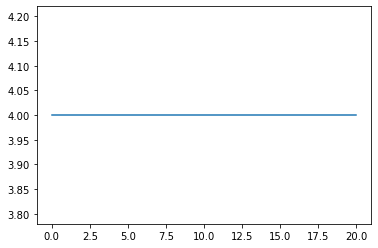

In [62]:
occ = occupancy_array(block, 20, 20)  
plt.plot(occ)

### Spaceship and Oscillator pattern

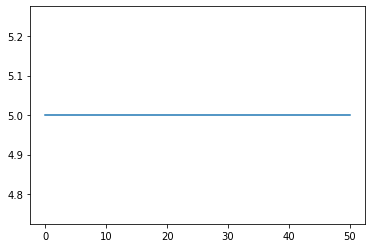

In [63]:
occ = occupancy_array(glider, 50, 50)  
plt.plot(occ)

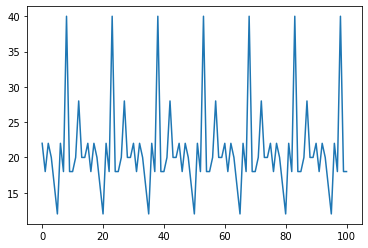

In [72]:
occ = occupancy_array(penta_dec, 100, 50)  
plt.plot(occ)

### Spaceship generator and Space filler

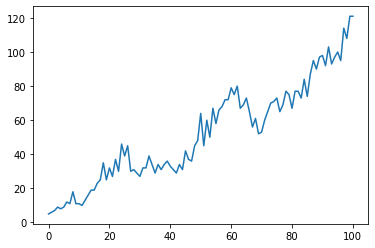

In [71]:
occ = occupancy_array(conway, 100, 100, 'middle')  
plt.plot(occ)

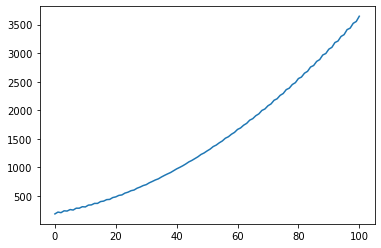

In [74]:
occ = occupancy_array(maxCoe, 100, 200, 'middle')  
plt.plot(occ)

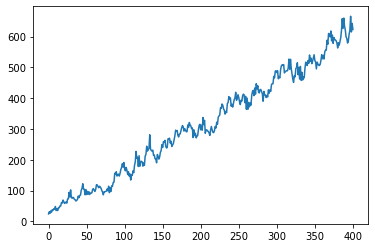

In [60]:
occ = occupancy_array(puffer, 400, 200, 'middle')  
plt.plot(occ)

## Still lifes pattern analysis

## Oscillators pattern analysis

## Spaceships pattern analysis